Identifying the most reliable candlestick patterns at the end of an accumulation phase (which typically signals the start of an uptrend) is crucial for traders. These patterns suggest that the market is transitioning from a consolidation or sideways movement to a bullish phase. Here are some of the most reliable candlestick patterns for this scenario:

1. Engulfing

	•	Description: A two-candle pattern where the second (bullish) candle completely engulfs the body of the previous (bearish) candle.
	•	Indication: Strong buying pressure, signaling the end of selling and the beginning of an uptrend.

2. Morning Star

	•	Description: A three-candle pattern with a long bearish candle, followed by a small indecision candle (doji or spinning top), and then a strong bullish candle.
	•	Indication: The pattern shows a shift from selling pressure to buying pressure, marking a potential reversal and the start of an uptrend.

3. Hammer

	•	Description: A single-candle pattern with a small body and a long lower wick. It appears after a downtrend or consolidation, with little to no upper wick.
	•	Indication: Indicates that sellers pushed prices lower, but buyers regained control, signaling potential upward momentum.

4. Inverted Hammer

	•	Description: Similar to a hammer but with a long upper wick and a small body near the bottom.
	•	Indication: After a period of sideways or downward movement, this pattern signals that buyers may begin to take control, marking the start of an uptrend.

5. Piercing Pattern

	•	Description: A two-candle reversal pattern where the second bullish candle opens below the previous bearish candle’s close and closes above its midpoint.
	•	Indication: Signals that buyers are stepping in after a period of weakness, potentially initiating an uptrend.

6. Three White Soldiers

	•	Description: A three-candle pattern consisting of three consecutive long bullish candles with small wicks.
	•	Indication: Strong and sustained buying pressure after a consolidation, often signaling the beginning of a powerful uptrend.

7. Rising Three Methods

	•	Description: A continuation pattern with three small bearish candles within the range of a long bullish candle, followed by another long bullish candle.
	•	Indication: Confirms that the accumulation phase is over, and a strong uptrend is about to continue.

Each of these patterns suggests increased buying pressure and a potential shift in market sentiment, making them strong indicators of the end of an accumulation phase and the beginning of an uptrend. Combining these patterns with volume analysis or other technical indicators can further confirm the trend reversal.

### **Candle Stick Patterns Screen**



In [2]:
import yfinance as yf
import pandas as pd
import talib
import matplotlib.pyplot as plt
import mplfinance as mpf

In [28]:
# Function to download data from yfiance and make some adjustments
def download_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date, progress=False)
    # Drop the 'Close' column and use the 'Adj Close'
    data = data.drop(columns=['Close'])
    # Check if the necessary columns exist
    required_columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
    if not all(col in data.columns for col in required_columns):
        print(f"Missing columns: {', '.join([col for col in required_columns if col not in data.columns])}")
    data.columns = range(len(data.columns))  
    # Rename columns to desired names
    data.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
    data = data.dropna(subset=['Close', 'High', 'Low', 'Open', 'Volume'])
    # Keep only required columns and rename 'Adj Close' to 'Close' for mpl finance
    data = data[['Close', 'Open', 'High', 'Low', 'Volume']]

    # Ensure the index is of datetime type
    data.index = pd.to_datetime(data.index)
    
    # Drop rows with missing values in the relevant columns
    data = data.dropna()
    
    return data
    
# Function to identify candlestick patterns
def detect_candlestick_patterns(df):
    # Drop rows with missing values
    #df = df.dropna(subset=['Open', 'High', 'Low', 'Adj Close'])

    # Check if there are enough rows to calculate patterns
    if len(df) < 5:
        print("Not enough data to detect patterns.")
        return df

    # Convert DataFrame columns to numpy arrays
    open_prices = df['Open'].values
    high_prices = df['High'].values
    low_prices = df['Low'].values
    close_prices = df['Close'].values  # Use 'Adj Close' instead of 'Close'
    
    # Ensure all arrays have the same length
    if not (len(open_prices) == len(high_prices) == len(low_prices) == len(close_prices)):
        print("Input arrays have different lengths.")
        return df
    
    # Candlestick pattern detection
    patterns = {
        'Engulfing': talib.CDLENGULFING(open_prices, high_prices, low_prices, close_prices),
        'Morning Star': talib.CDLMORNINGSTAR(open_prices, high_prices, low_prices, close_prices, penetration=0.3),
        'Hammer': talib.CDLHAMMER(open_prices, high_prices, low_prices, close_prices),
        'Inverted Hammer': talib.CDLINVERTEDHAMMER(open_prices, high_prices, low_prices, close_prices),
        'Piercing Pattern': talib.CDLPIERCING(open_prices, high_prices, low_prices, close_prices),
        'Three White Soldiers': talib.CDL3WHITESOLDIERS(open_prices, high_prices, low_prices, close_prices),
        'Rising Three Methods': talib.CDLRISEFALL3METHODS(open_prices, high_prices, low_prices, close_prices),
    }

    # Add detected patterns to the DataFrame
    for pattern_name, pattern in patterns.items():
        df[pattern_name] = pattern
    return df


# Filter for selected patterns
def filter_patterns(df):
    detected_patterns = df[(df['Engulfing'] != 0) |
                           (df['Morning Star'] != 0) |
                           (df['Hammer'] != 0) |
                           (df['Inverted Hammer'] != 0) |
                           (df['Piercing Pattern'] != 0) |
                           (df['Three White Soldiers'] != 0) |
                           (df['Rising Three Methods'] != 0)]
    return detected_patterns
    

    
    
# Function to plot the candlestick chart with pivot points and EMA
def plot_candlestick_chart(df, ticker):
    # Calculate pivot point, support, and resistance levels
    df['Pivot Point'] = (df['High'] + df['Low'] + df['Close']) / 3
    df['Support 1'] = (2 * df['Pivot Point']) - df['High']
    df['Resistance 1'] = (2 * df['Pivot Point']) - df['Low']
    # Calculate 8-day EMA
    df['8-Day EMA'] = df['Close'].ewm(span=8, adjust=False).mean()
    # Add pivot points, support/resistance, and 8-EMA
    ap_lines = [
        mpf.make_addplot(df['Pivot Point'], color='black', linestyle='--', width=1.5, label='Pivot Point'),
        mpf.make_addplot(df['Support 1'], color='red', linestyle='--', width=2.5, alpha=0.6, label='Support 1'),
        mpf.make_addplot(df['Resistance 1'], color='green', linestyle='--', width=2.5, alpha=0.6, label='Resistance 1'),
        mpf.make_addplot(df['8-Day EMA'], color='blue', linestyle='-', width=2, label='8-Day EMA')
    ]

    # Plot the candlestick chart
    mpf.plot(
        df,
        type='candle',
        style='charles',
        addplot=ap_lines,
        title=f'{ticker} Candlestick Chart',
        ylabel='Price',
        volume=True,
        figsize=(16, 9) 
    )


1.	Pattern Detection: Bullish Engulfing, Morning Star, Hammer, Inverted Hammer, Piercing Pattern, Three White Soldiers, and Rising           Three Methods. 
 
2.  Each pattern returns an array where:
        	0 indicates no pattern.
        	100 or -100 indicates a pattern (with positive/negative direction for bullish/bearish patterns).
         
3.	The script filters rows where any of the patterns are detected and outputs the relevant candlestick patterns with the OHLC data.


Detected candlestick patterns for SPY:

Date: 2024-09-30, Patterns: {'Engulfing': 100.0}

Date: 2024-10-15, Patterns: {'Engulfing': -100.0}



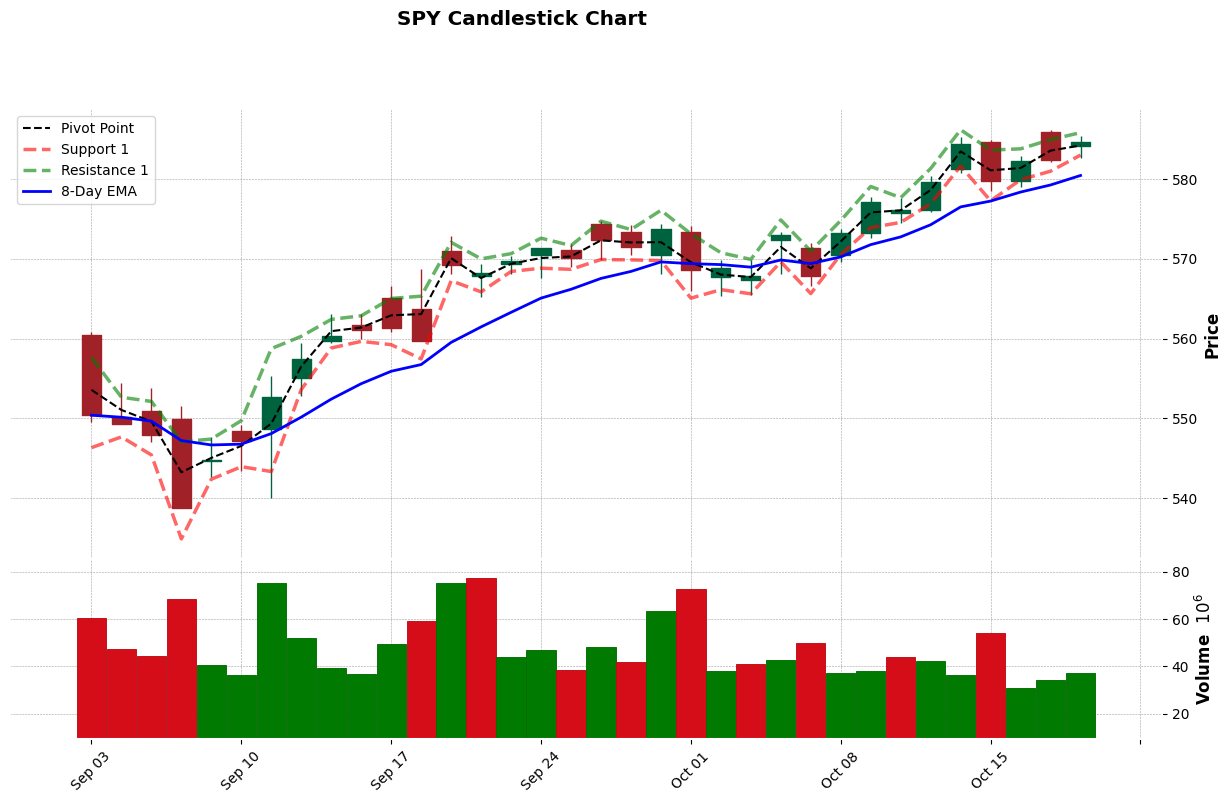


Detected candlestick patterns for QQQ:

Date: 2024-10-15, Patterns: {'Engulfing': -100.0}



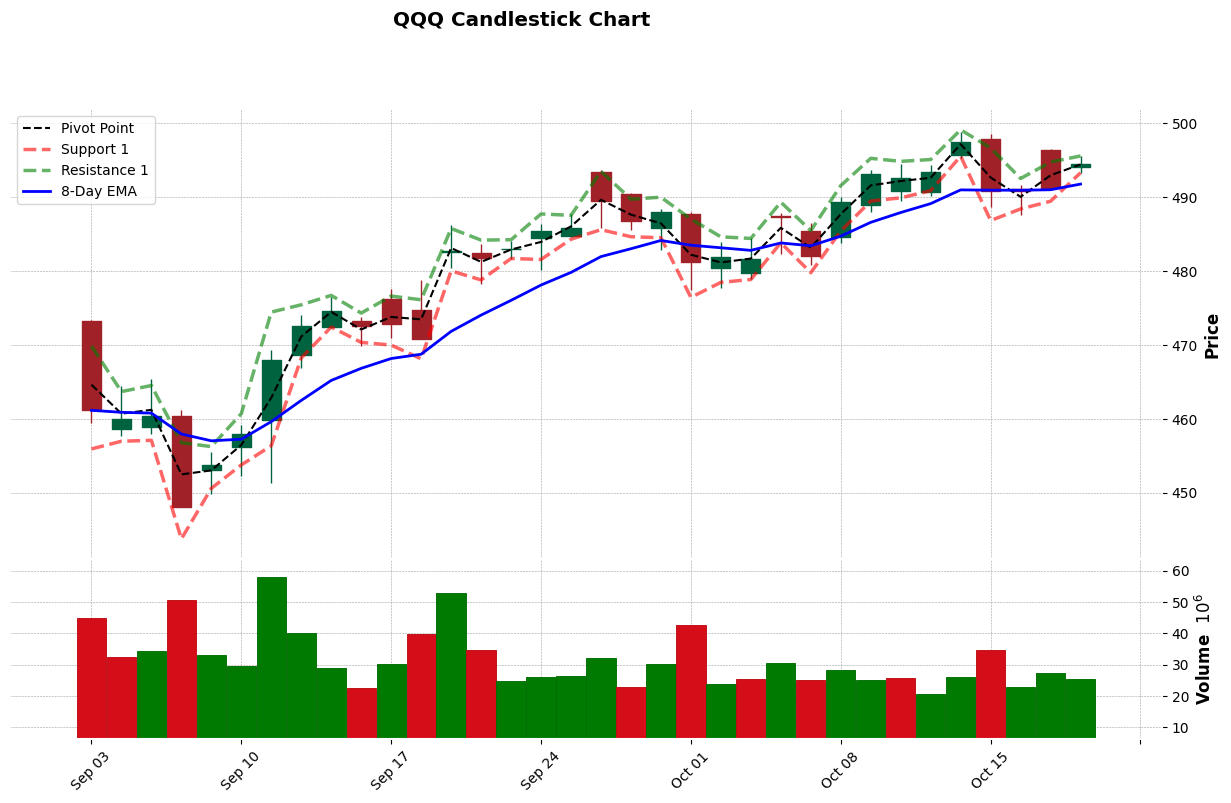


Detected candlestick patterns for OXY:

Date: 2024-09-20, Patterns: {'Hammer': 100.0}

Date: 2024-10-14, Patterns: {'Hammer': 100.0}



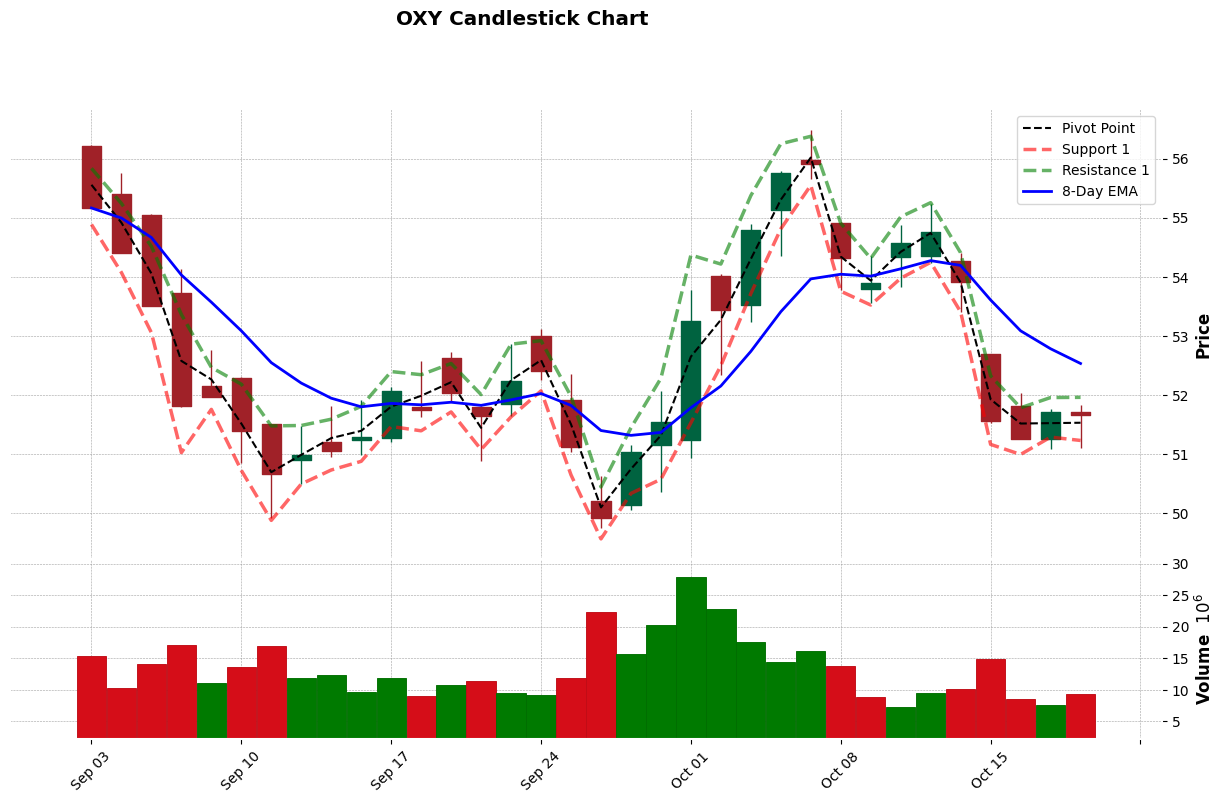


Detected candlestick patterns for ARM:

Date: 2024-09-05, Patterns: {'Engulfing': 100.0}

Date: 2024-10-07, Patterns: {'Engulfing': 100.0}



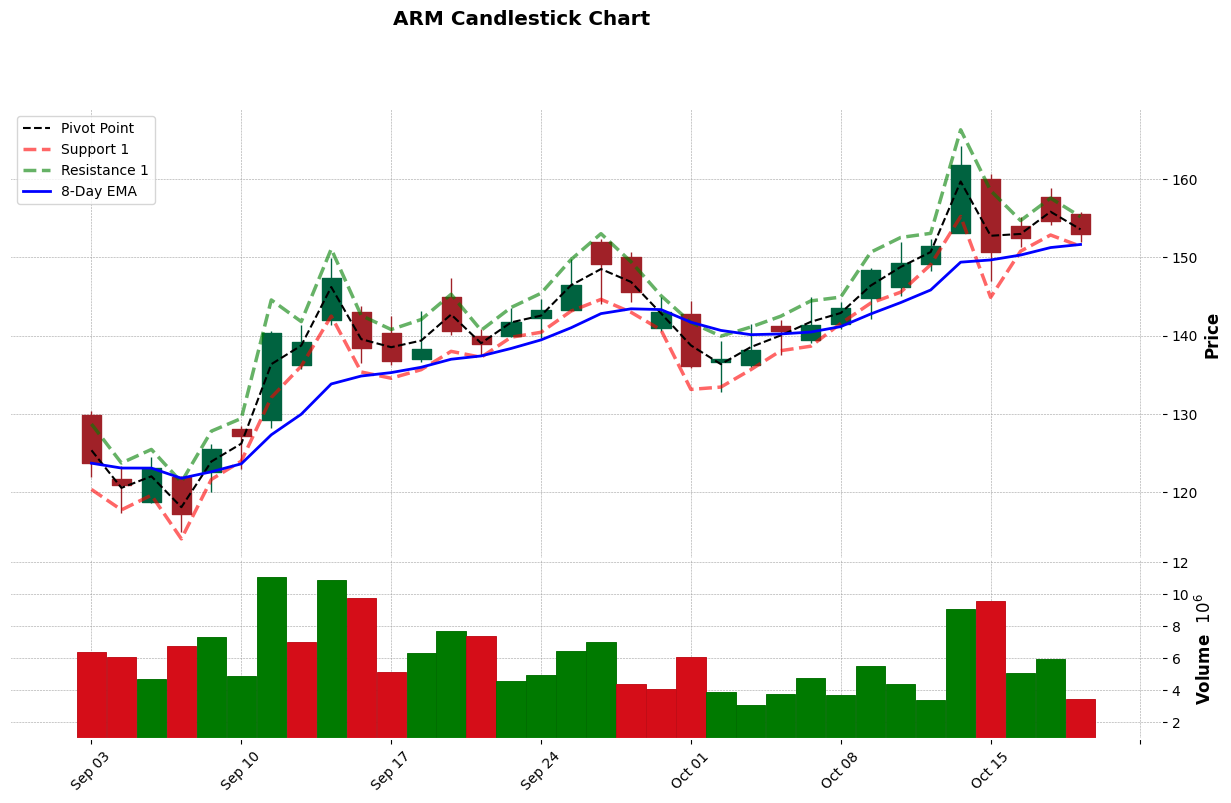


Detected candlestick patterns for CMG:

Date: 2024-09-18, Patterns: {'Engulfing': -100.0}

Date: 2024-10-01, Patterns: {'Engulfing': -100.0}

Date: 2024-10-07, Patterns: {'Engulfing': -100.0}

Date: 2024-10-10, Patterns: {'Engulfing': 100.0}

Date: 2024-10-16, Patterns: {'Engulfing': -100.0}



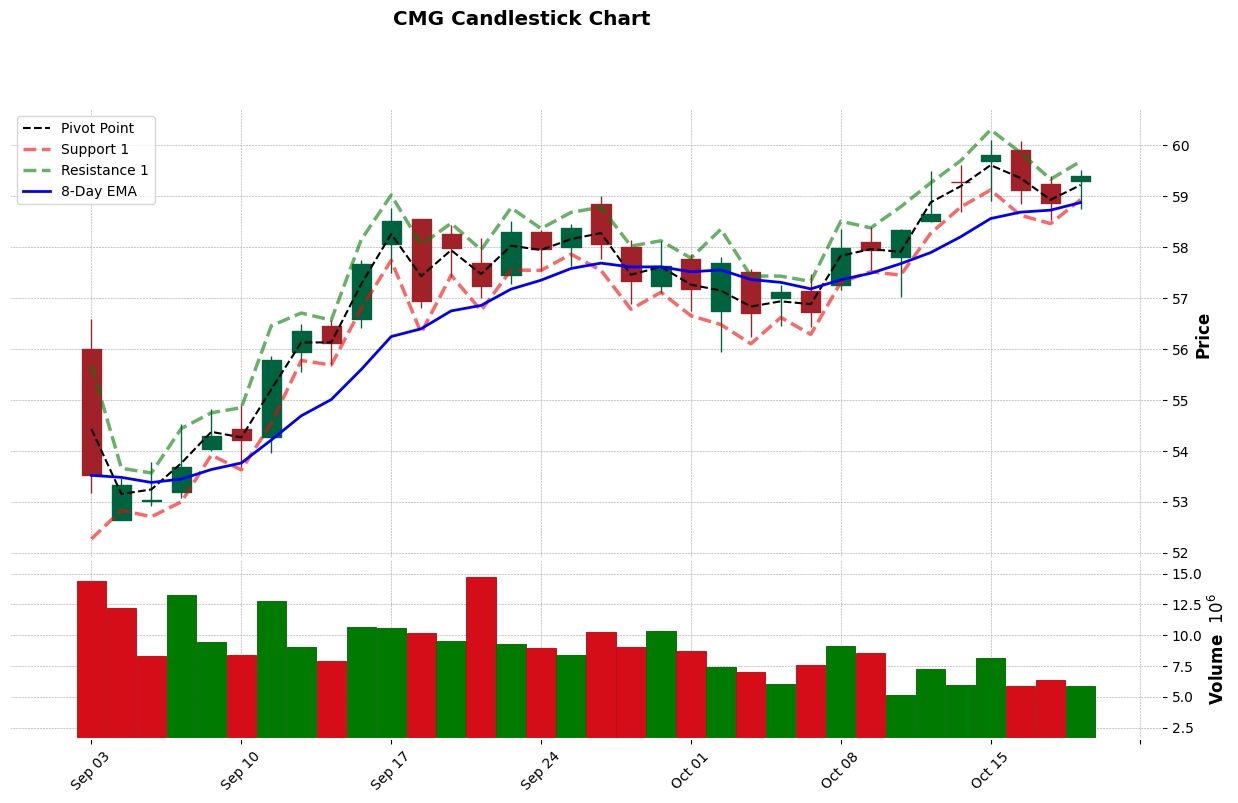

In [31]:
# Main code to process multiple tickers
tickers = ['SPY', 'QQQ', 'OXY', 'ARM', 'CMG']  
start_date = '2024-09-01'
end_date = '2024-10-19'

for ticker in tickers:
    df = download_data(ticker, start_date, end_date)
    df_with_patterns = detect_candlestick_patterns(df)
    detected_patterns = filter_patterns(df_with_patterns)
    detected_patterns.index = detected_patterns.index.strftime('%Y-%m-%d')
    
    print(f"\nDetected candlestick patterns for {ticker}:\n")
    pattern_columns = detected_patterns.columns[5:]  # Adjusted to the relevant pattern columns
    for idx, row in detected_patterns.iterrows():
        non_zero_patterns = row[pattern_columns][row[pattern_columns] != 0]
        if not non_zero_patterns.empty:
            print(f"Date: {idx}, Patterns: {non_zero_patterns.to_dict()}\n")
    
    # Plot the candlestick chart for each ticker
    plot_candlestick_chart(df, ticker)

### Ref: 
    - https://ta-lib.github.io/ta-lib-python/func_groups/pattern_recognition.html
    - https://ta-lib.org/functions/
    - https://thepatternsite.com/CandlePerformers.html